## chapter 2 – statistical learning

----- 

basic paradigm: 

- predictor variables: $X$ --> $X_1, X_2, \dots, X_p$ 

- response variable(s): $Y$ 


assume there is some relationship between them 

$$Y = f(X) + \epsilon$$


where $\epsilon$ is a random error term independent of $X$ with $\mu = 0$

**<center>statistical learning estimates $f$ !!</center>**




**<u> why estimate $f$ ? </u>**

- prediction 
    - $\hat{Y} = \hat{f}(X)$ : creating estimates for $f$ and $Y$ 
        - $\hat{f}$ is a black box as it does not care so much about the true $f$, only for predicting $\hat{Y} \approx Y$ 
        
        - *reducible* and *irreducible* errors 
            - in general, reducible is associated with deviations from target hypothesis *f* and irreducible associated with error from $\epsilon$  
            - $$E(Y - \hat{Y})^2 = E[f(X) + \epsilon - \hat{f}(X)]^2$$
                - reducible: $[f(X) - \hat{f}(X)]^2$ 
                - irreducible: $\text{Var}(\epsilon)$
            
- inference 
    - understand how $Y$ changes as a function of $X$ 
    - obviously $\hat{f}$ **can't** be a black box
    - coming up w answers to the following
        - which predictors associated with the response? 
        - what is relationship  between the response and each predictor? 
        - can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more complicated
        
        
        
**<u> how to estimate $f$  </u>**


--> linear and nonlinear ways, but approaches are similar 


training data assumed to look like 

$$ \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n) \} $$ 

where 

$$x_i = (x_{i1}, x_{i2}, \dots, x_{ip}) $$ 




**parametric methods** 

*model-based* approach $\to$ reduces problem down to finding a set of parameters 

1. make assumption about shape / form $\to$ impose bias!!
    - for ex. if we make linear assumption, you only need to estimate set of coefficients $\beta$   

2. use training data to *fit* or *train* model 
    - ex. ordinary least squares 
    

downside: $\hat{f}$ may not actually represent $f$



**non-parametric methods** 

- no explicit assumptions made about $f$ $\to$ very little bias!!

- very data hungry – need a lot of examples to accurately represent $f$  


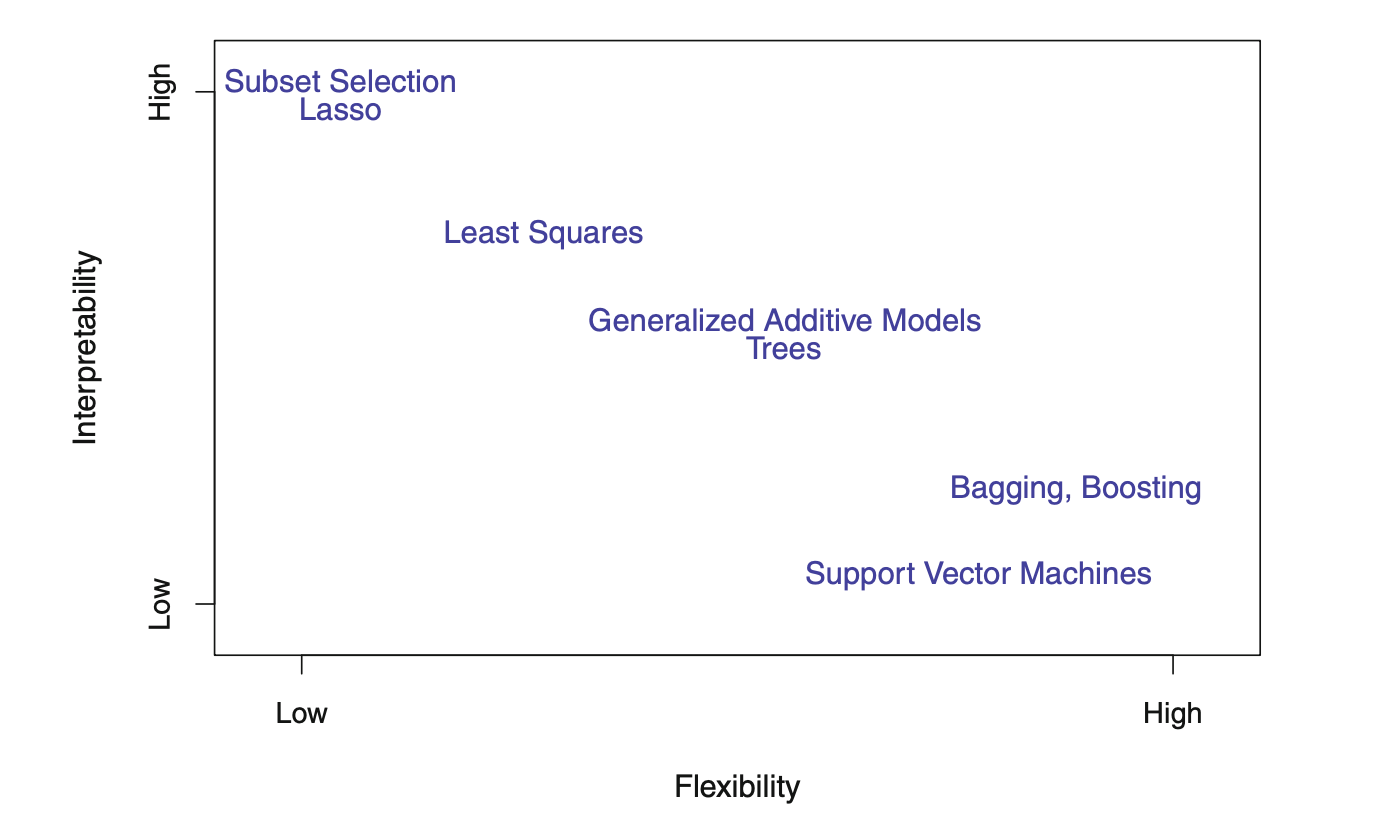 


---- 

<u> **Model Accuracy** </u>


*Mean Squared Error (MSE)* 

average of the predictions - test squared

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2 $$

because of the square, large error if some predictions are way off 


---- 


<u> **Bias-Variance Tradeoff** </u>

$\to$ basic intuition is that the test error (ex. test MSE) for a given value, say $x_0$,  can be decomposed into the sum of the following three qty's: 

- variance of $\hat{f}(x_0)$ 
- squared bias of $\hat{f}(x_0)$ 
- variance of error term $\epsilon$ 

$$ E(y_0 - \hat{f}(x_0))  = \text{Var}(\hat{f}(x_0)) + [ \text{Bias}(\hat{f}(x_0)) ] + \text{Var}(\epsilon) $$


- *variance*: sensitivity of $f$ given a different training set (small changes in training data will make large difference in $f$) 
- *bias*: restrictions placed on hypothesis class $f$ -- linear, polynomial, etc 

ex. increasing bias, such as restricting $f$ to a linear function, will in turn lower variance since parameter set is also restrcited to just linear coefficients 


--- 

<u> **Classification Paradigm** </u>


training data like... 

$$ \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n) \} $$ where $y$ is categorical


we still attempt to fit $\hat{f}(x)$ to predict $y$, and error is now framed as...

$$ \frac{1}{n} \sum_{i=1}^{n}I(y_i \neq \hat{y_i}) $$ wher $I$ is indicator variable that = 1 if $y_i \neq \hat{y_i}$ and 0 otherwise

--- 

<u> **Bayes Classifier** </u>

$\to$ classifier formed to assign each obervation to most likely class (determined from some method)

$$ \text{Pr}(Y = j | X = x_0) $$ where $x_0$ is input (predictor) vector 

we never know true distribution of $X$ so it's an unattainable standard...



<u> **K-Nearest Neighbors** </u> .... an example of a Bayes Classifier 


represented as...

$$ \text{Pr}(Y = j | X = x_0 ) = \frac{1}{K} \sum_{i \in \tau_0} I(y_i = j) $$

basically 

$\to$ given a new data point $x^*$ 

1. find the nearest $K$ points to $x^*$ 
2. of those nearest $K$ data points, classify $x^*$ according to the majority class 



let's implement it from scratch!! 




In [24]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

let's make some fake data with rough clusters and labels 

In [34]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

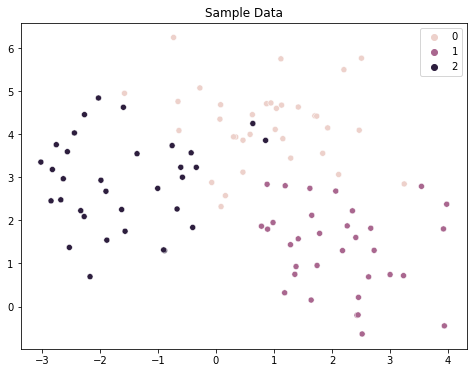

In [157]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.title('Sample Data')
plt.show()

Underneath is my function for classifying a new point using the KNN algorithm. I use [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance#:~:text=In%20mathematics%2C%20the%20Euclidean%20distance,being%20called%20the%20Pythagorean%20distance.) as to find the $K$ nearest points, but this can be substituted for any distance metric! 


In [91]:
# need a distance metric 
def dist(a, b): 
    d = np.linalg.norm(np.array(a)-np.array(b))
    return d 

# vectorized distance 
dist_vec = np.vectorize(dist)

# get most freq element in list
def most_frequent(L):
    return max(set(L), key = L.count)

def KNN(x, y, x_star, K=5): 
    
    # 1. find distance from x* to all points in x 
    
    distances = [dist(point, x_star) for point in X] 
    distances = list(enumerate(distances)) 
    
    # 2. sort to the lowest K dist 
    
    sorted_dists = sorted(distances, key=lambda x: x[1])[:K]
    
    # 3. get the labels for the closest points 
    
    inds = [x[0] for x in sorted_dists] 
    
    y_candidates = [y[i] for i in inds]
    
    return most_frequent(y_candidates)

let's go though the data and classify points according to the KNN algorithm with 5 clusters, and then see how it compares to the true labels 

In [100]:
preds = []
for p in X: 
    preds.append(KNN(x=X, y=y, x_star=p))

now, let's compare our KNN predictions to the actual labels

underneath, KNN predictions are plotted and misclassified points are circled

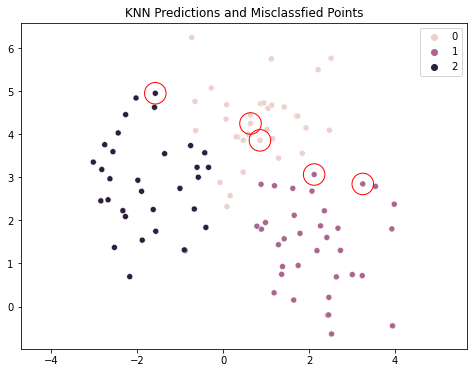

In [155]:
circ = []
for (xy, ry, py) in zip(X, y, preds): 
    if ry != py: 
        circ.append(True)
    else: 
        circ.append(False)

fig, ax = plt.subplots(figsize=(8,6)) 
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=preds) 


circles = [plt.Circle((xx, yy), 0.25, color='r', fill=False) for (xx, yy), c in zip(X, circ) if c]  
ax.set_aspect('equal', adjustable='datalim')

for circle in circles: 
    ax.add_patch(circle) 

plt.title('KNN Predictions and Misclassfied Points')
plt.show()